# ِDataset MetaData

# Import Libraries

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


import random

# Read Dataset

In [52]:

df=pd.read_csv('/Users/denistkachenko/Documents/marketing_AB.csv')
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


# Explore Dataset

In [53]:
df.shape

(588101, 7)

In [54]:
df.head(5)

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [55]:
df.tail(5)

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23
588100,588100,1237779,ad,False,1,Tuesday,23


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [57]:
df.describe(include="all")

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
count,588101.000000,5.881010e+05,588101,588101,588101.000000,588101,588101.000000
unique,NaN,NaN,2,2,NaN,7,NaN
top,NaN,NaN,ad,False,NaN,Friday,NaN
freq,NaN,NaN,564577,573258,NaN,92608,NaN
mean,294050.000000,1.310692e+06,NaN,NaN,24.820876,NaN,14.469061
std,169770.279667,2.022260e+05,NaN,NaN,43.715181,NaN,4.834634
min,0.000000,9.000000e+05,NaN,NaN,1.000000,NaN,0.000000
25%,147025.000000,1.143190e+06,NaN,NaN,4.000000,NaN,11.000000
50%,294050.000000,1.313725e+06,NaN,NaN,13.000000,NaN,14.000000
75%,441075.000000,1.484088e+06,NaN,NaN,27.000000,NaN,18.000000


In [58]:
df.columns

Index(['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads',
       'most ads day', 'most ads hour'],
      dtype='object')

# Data cleansing

In [59]:
if "Unnamed: 0" in df.columns:
   
    df = df.drop(["Unnamed: 0"], axis =1)

In [60]:
df.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)
df.head(1)

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,1069124,ad,False,130,Monday,20


In [97]:
#duplicate rows?
dups = df.duplicated()
print(dups.any())

False


In [62]:
#duplicated user_id?
df[df["user_id"].duplicated()].count()

user_id          0
test_group       0
converted        0
total_ads        0
most_ads_day     0
most_ads_hour    0
dtype: int64

In [63]:
print(f'Rows            : {df.shape[0]}')
print(f'Columns         : {df.shape[1]}')
print(f'Features        : {df.columns.tolist()}')
print(f'Missing Values  : {df.isnull().values.sum()}')
print(f'Unique Values   : \n\n{df.nunique()}')

Rows            : 588101
Columns         : 6
Features        : ['user_id', 'test_group', 'converted', 'total_ads', 'most_ads_day', 'most_ads_hour']
Missing Values  : 0
Unique Values   : 

user_id          588101
test_group            2
converted             2
total_ads           807
most_ads_day          7
most_ads_hour        24
dtype: int64


In [64]:
df.isnull().any()

user_id          False
test_group       False
converted        False
total_ads        False
most_ads_day     False
most_ads_hour    False
dtype: bool

In [65]:
df["converted_int"] = df['converted'].apply(lambda x:1 if x== True  else  0)
df["converted_int"].sum()

14843

In [66]:
df.head(5)

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour,converted_int
0,1069124,ad,False,130,Monday,20,0
1,1119715,ad,False,93,Tuesday,22,0
2,1144181,ad,False,21,Tuesday,18,0
3,1435133,ad,False,355,Tuesday,10,0
4,1015700,ad,False,276,Friday,14,0


# EDA

In [99]:
def val_count(column):
    plt.figure(figsize=(14,13))
    sns.countplot(data=df, x=column)
    plt.title(f'Value Count - {column}')
    plt.show()

    #print(df[column].value_counts())

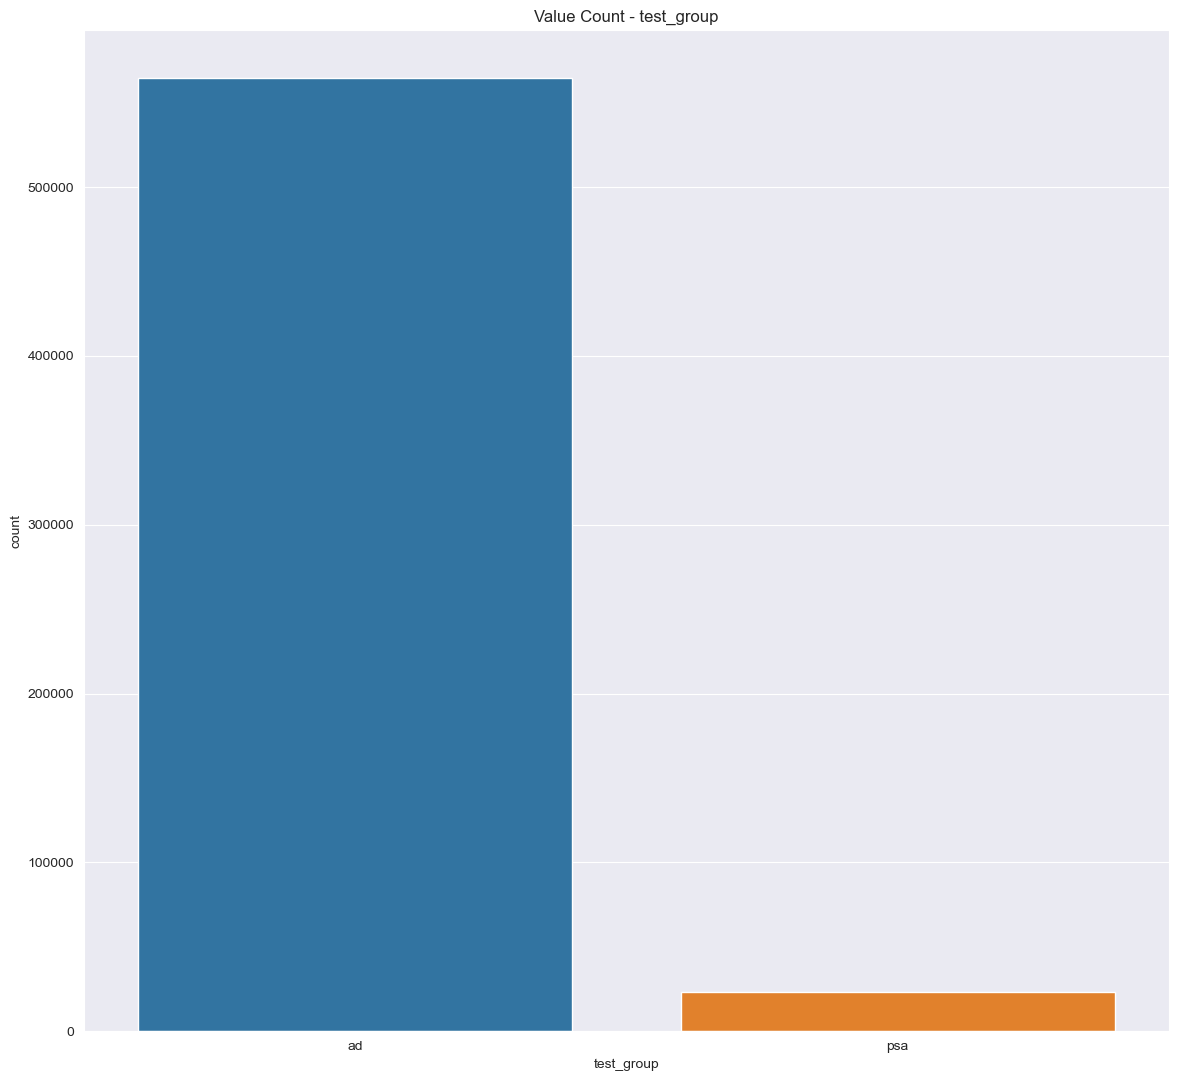

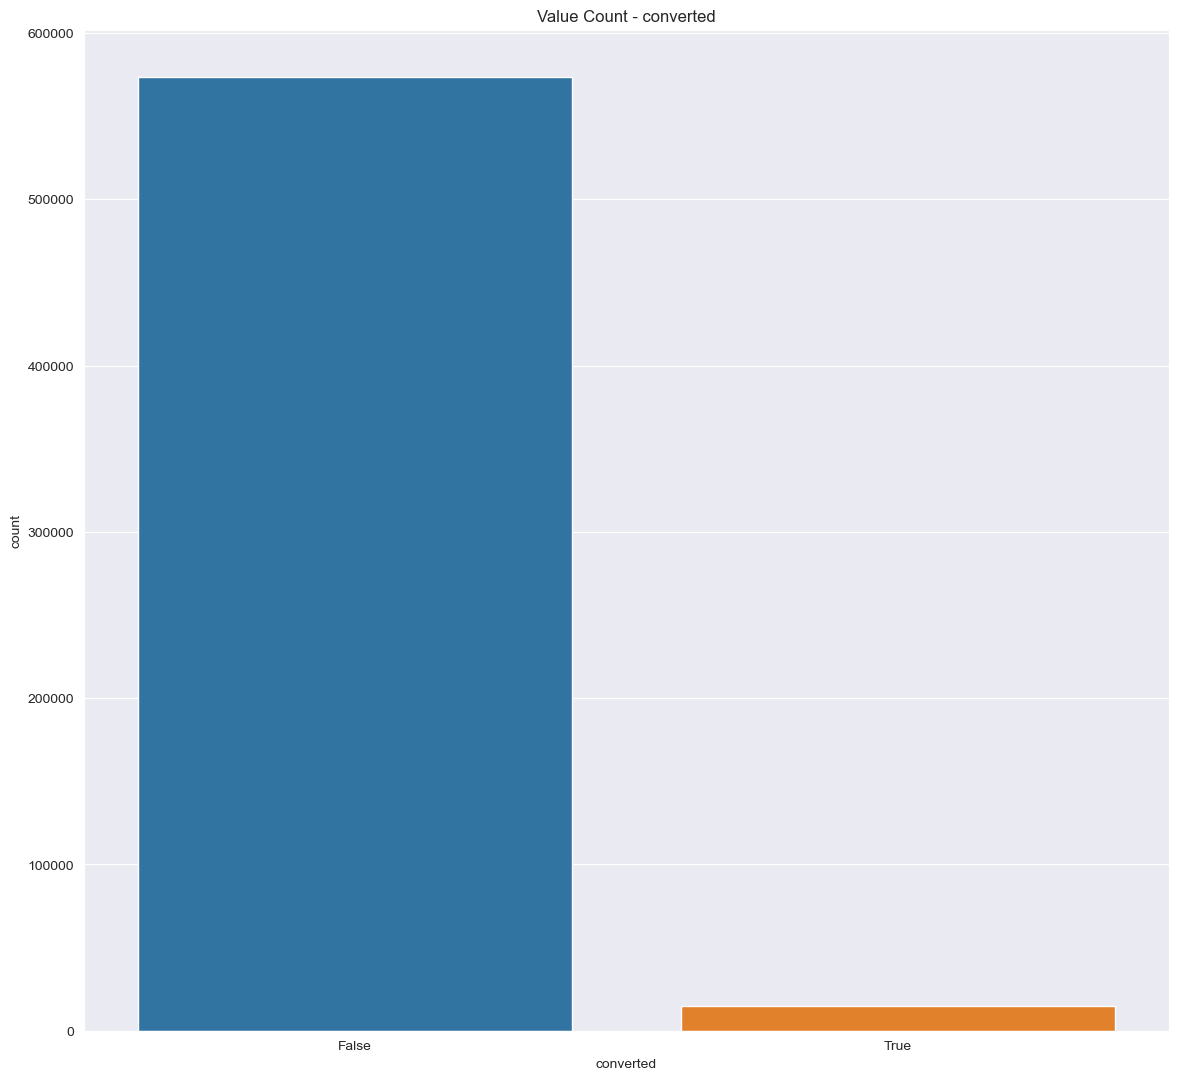

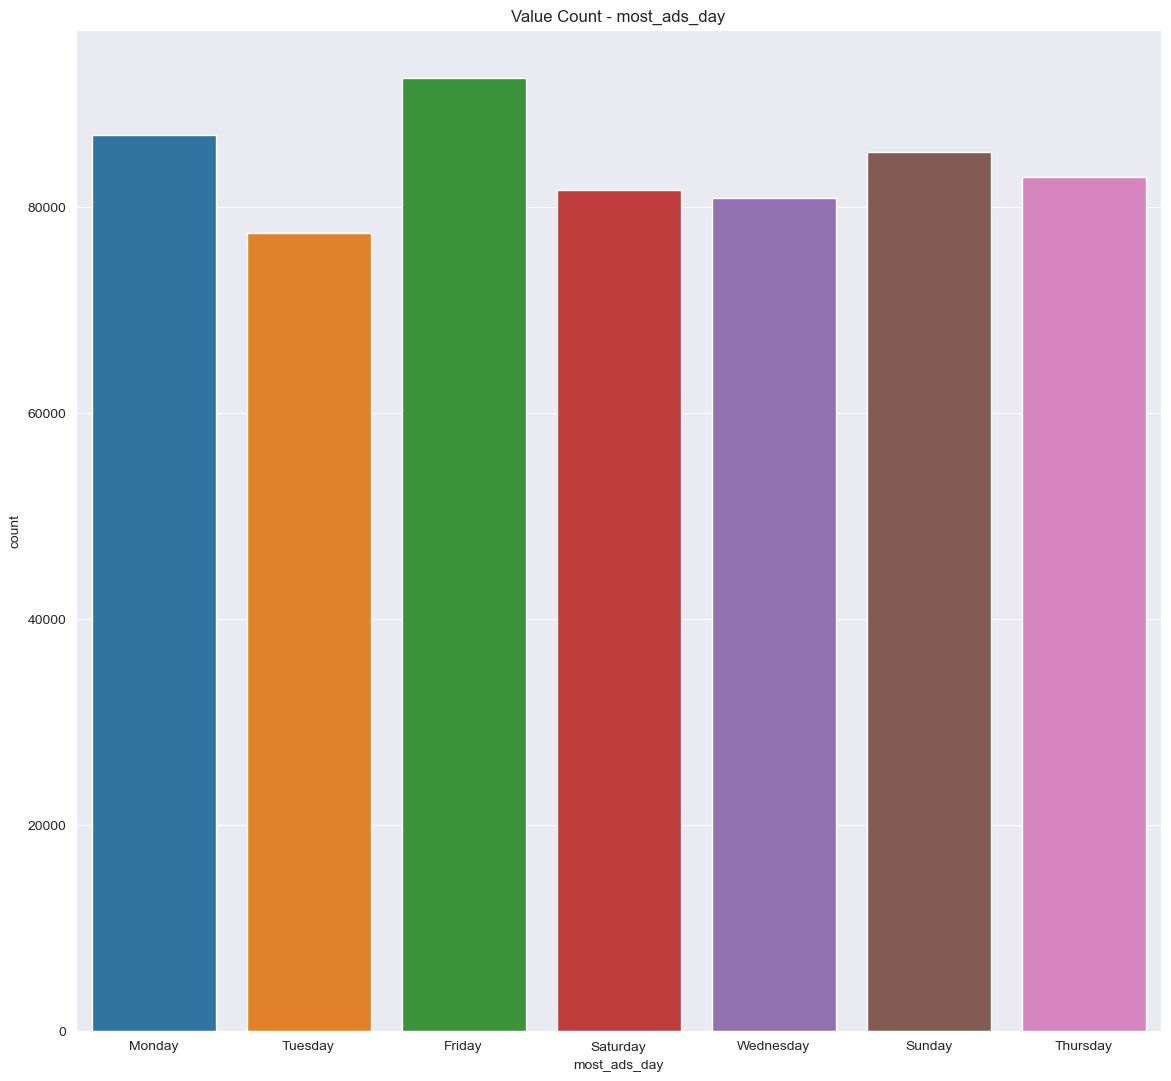

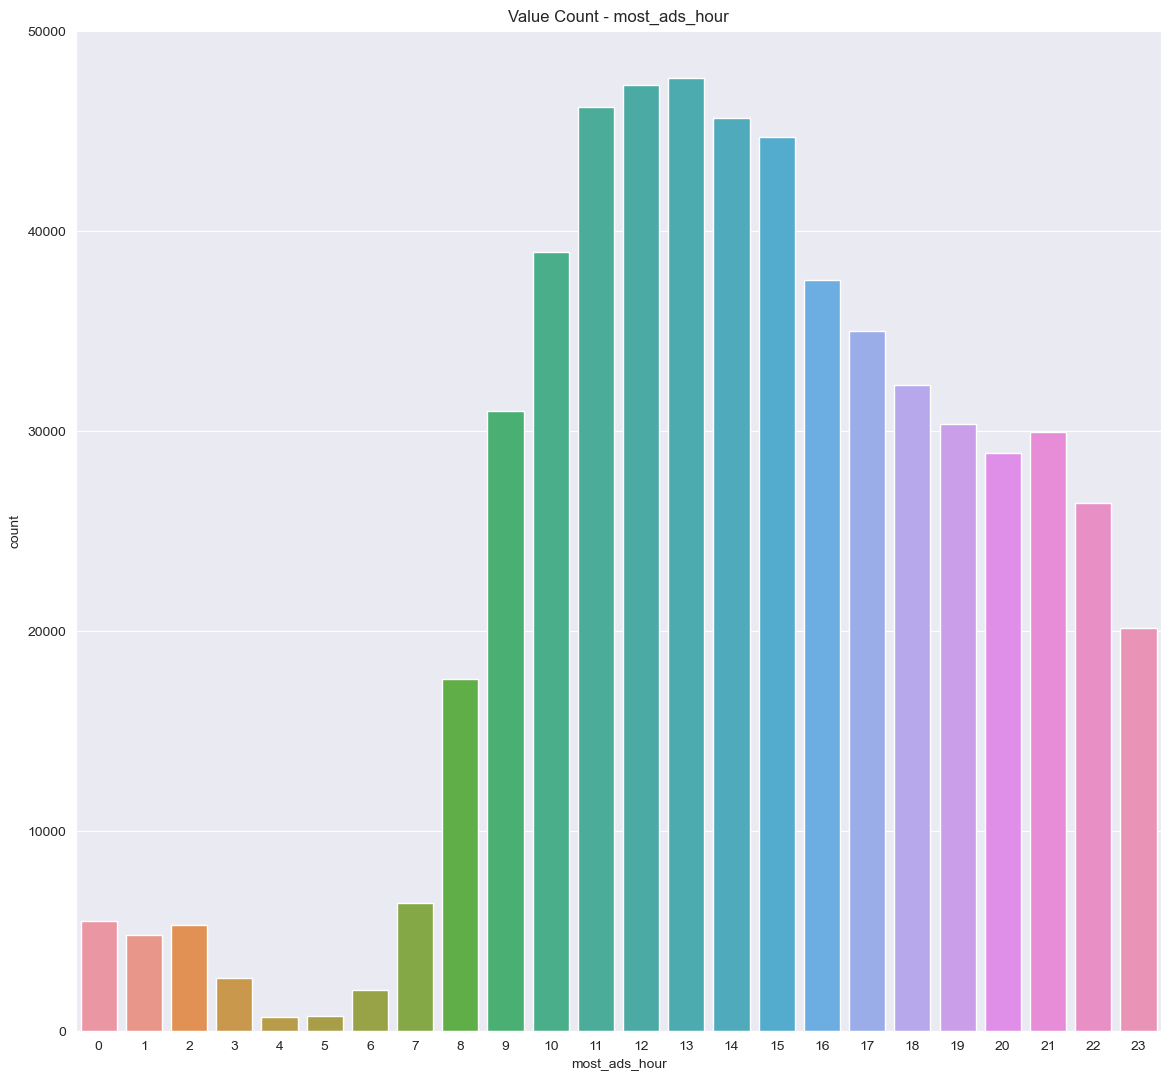

In [100]:
#create columns of interest
col_lst = df.columns[[1,2,4,5]]

#loop through columns of interest
for i in col_lst:
    val_count(i)

the majority of users saw the ads compared to those saw the psa

the most ads seen by a user occurred on Friday and then Monday

between 10AM and 3PM, users saw the most ads

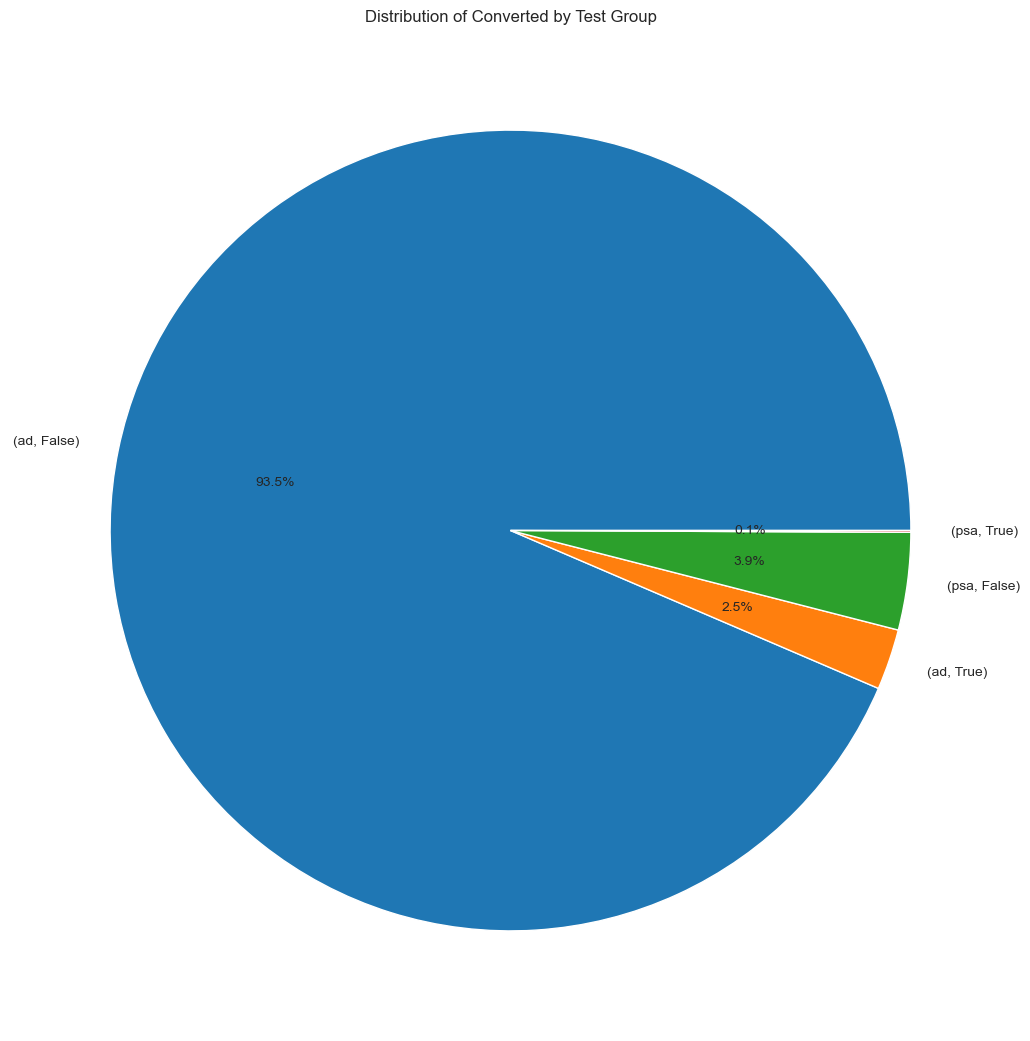

In [101]:
grouped_counts = df.groupby('test_group')['converted'].value_counts()


# Plot the data as a pie chart
grouped_counts.plot.pie(figsize= (14,13),autopct='%1.1f%%')

# Set the title and axis labels
plt.title('Distribution of Converted by Test Group')
plt.ylabel('')

# Show the plot
plt.show()


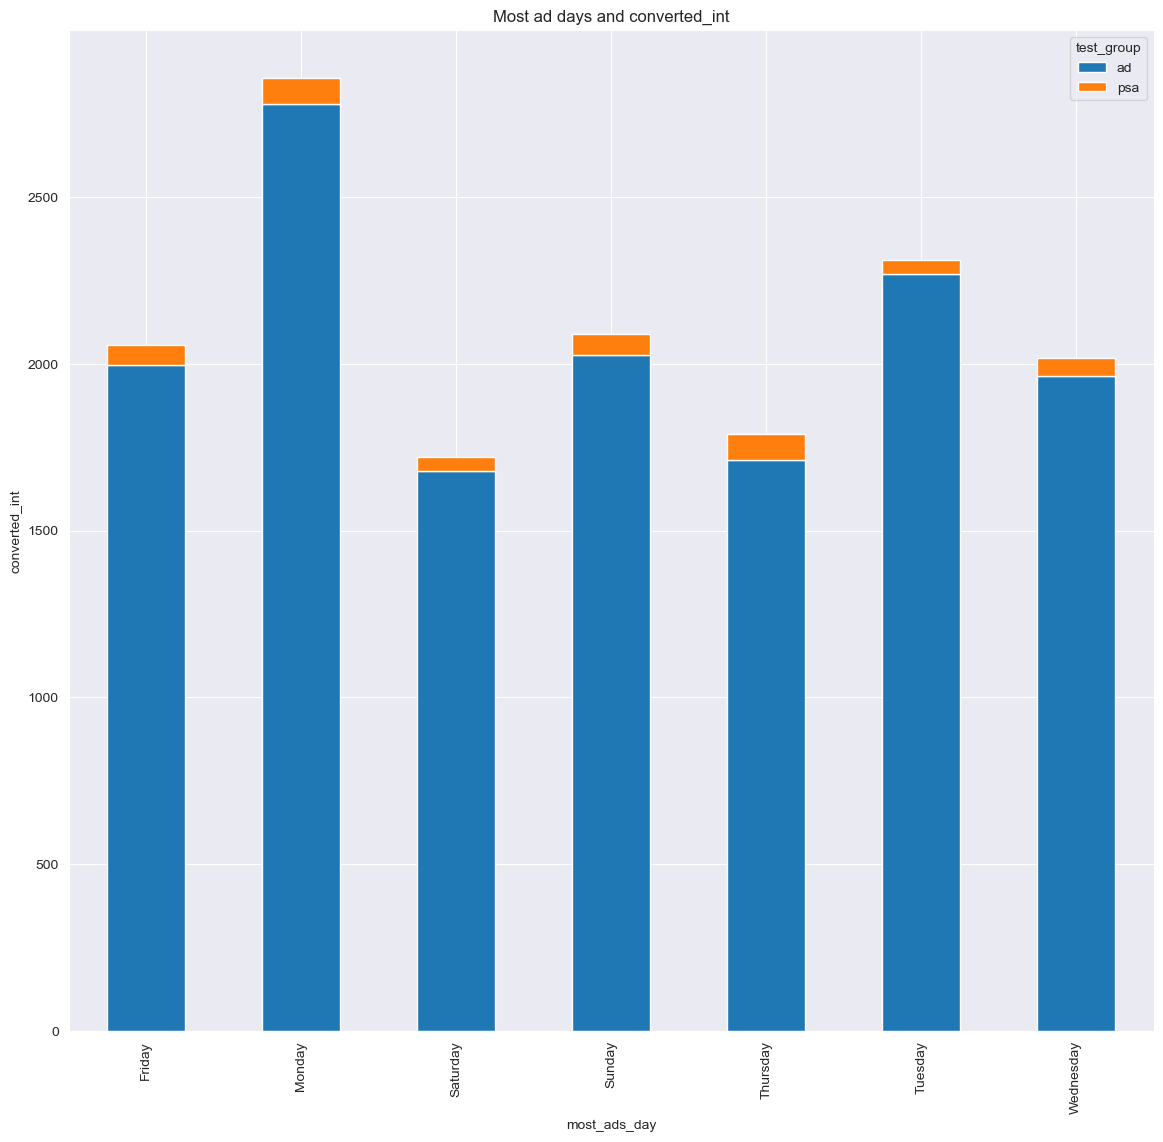

In [102]:
ax =df.groupby(by =['most_ads_day', 'test_group']).sum()['converted_int'].unstack('test_group').plot(kind= 'bar', figsize= (14,13), grid= True, stacked= True)
ax.set_ylabel('converted_int')
ax.set_title('Most ad days and converted_int')
plt.show()

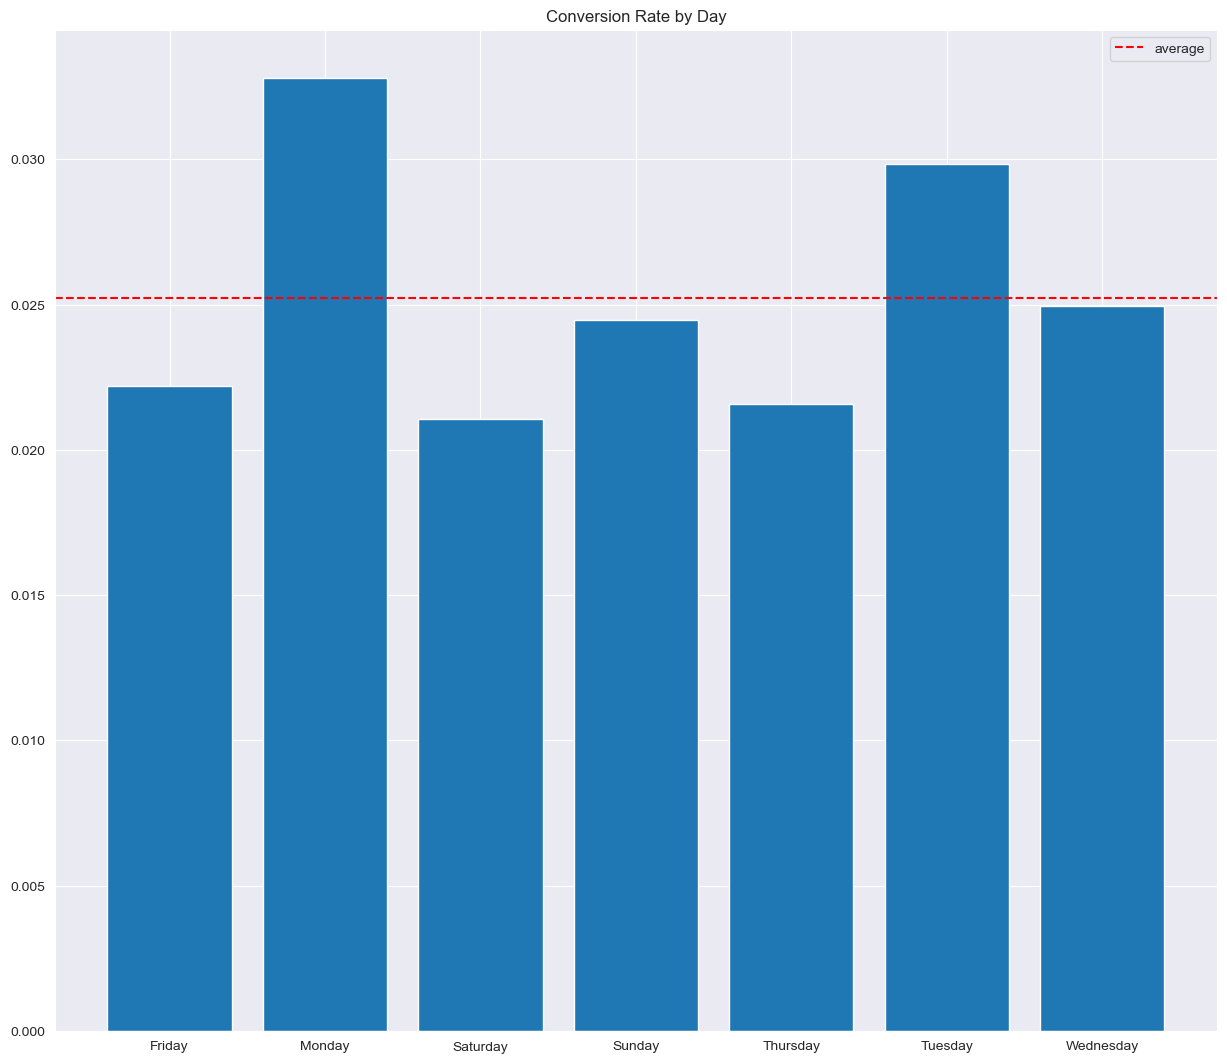

In [103]:
#visualize conversion by day
df_day_conv = pd.DataFrame(df.groupby('most_ads_day')['converted'].mean())
df_day_conv.reset_index(inplace=True)

plt.figure(figsize=(15,13))
plt.bar(data=df_day_conv, x='most_ads_day', height='converted')
plt.title('Conversion Rate by Day')
plt.axhline(df['converted'].mean(), color='r', linestyle='--', label='average')
plt.legend()
plt.show()

# AB test

### Minimum Sample Size

In [72]:
import math

def sample_size_calculator(population_size, confidence_level, margin_of_error):
    z_score = {
        0.90: 1.645,
        0.95: 1.96,
        0.99: 2.576
    }
    
    z = z_score[confidence_level]
    p = 0.5 # assuming 50% for a conservative estimate of the sample size
    q = 1 - p
    
    sample_size = ((z**2) * p * q * population_size) / ((z**2 * q) + ((margin_of_error**2) * (population_size - 1)))
    return math.ceil(sample_size)

In [73]:
#compute sample size 
pop_size = df.shape[0]
conf_level = 0.99
margin_err = 0.03

sample_size = sample_size_calculator(pop_size, conf_level, margin_err)
print(f"The population size is :{pop_size} \nThe required sample size is: {sample_size}")

The population size is :588101 
The required sample size is: 1832


In [74]:
treatment = df.query('test_group == "ad"')
control = df.query('test_group == "psa"')


In [75]:
df.converted.mean() *100

2.523886203220195

In [105]:
control["converted"].mean()*100


1.785410644448223

In [104]:
treatment["converted"].mean()*100

2.5546559636683748

you can see the the mean of converted in treatment group is more than control group 
which make the hypothsis of ad has positive effect on conversion 

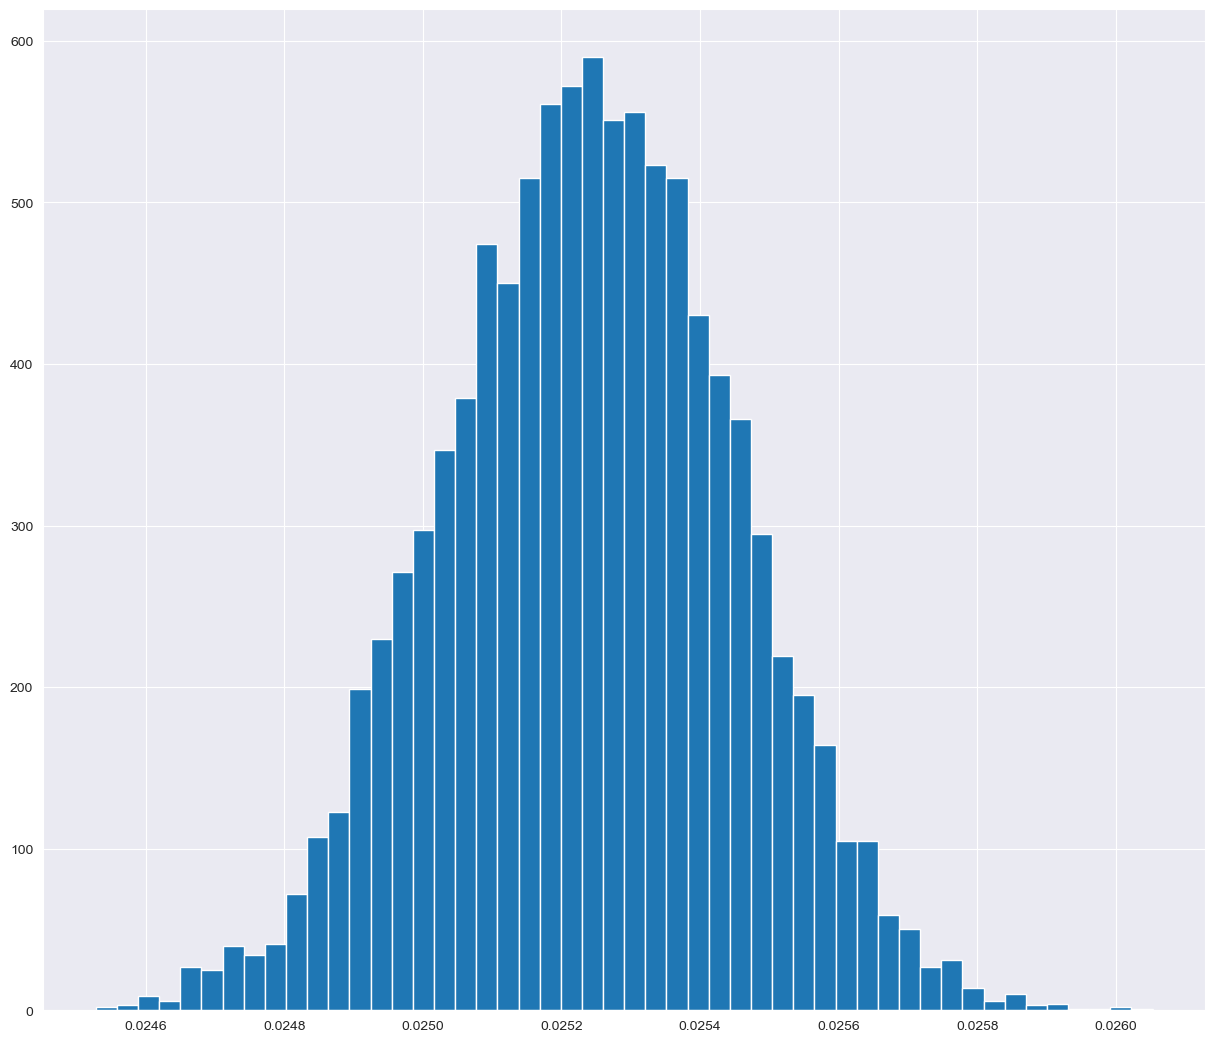

In [108]:
plt.figure(figsize=(15,13))
ad_converted = np.random.binomial(len(treatment),
                                  df.converted.mean(), 10000) / len(treatment)

plt.hist(ad_converted, bins=50)

plt.show()

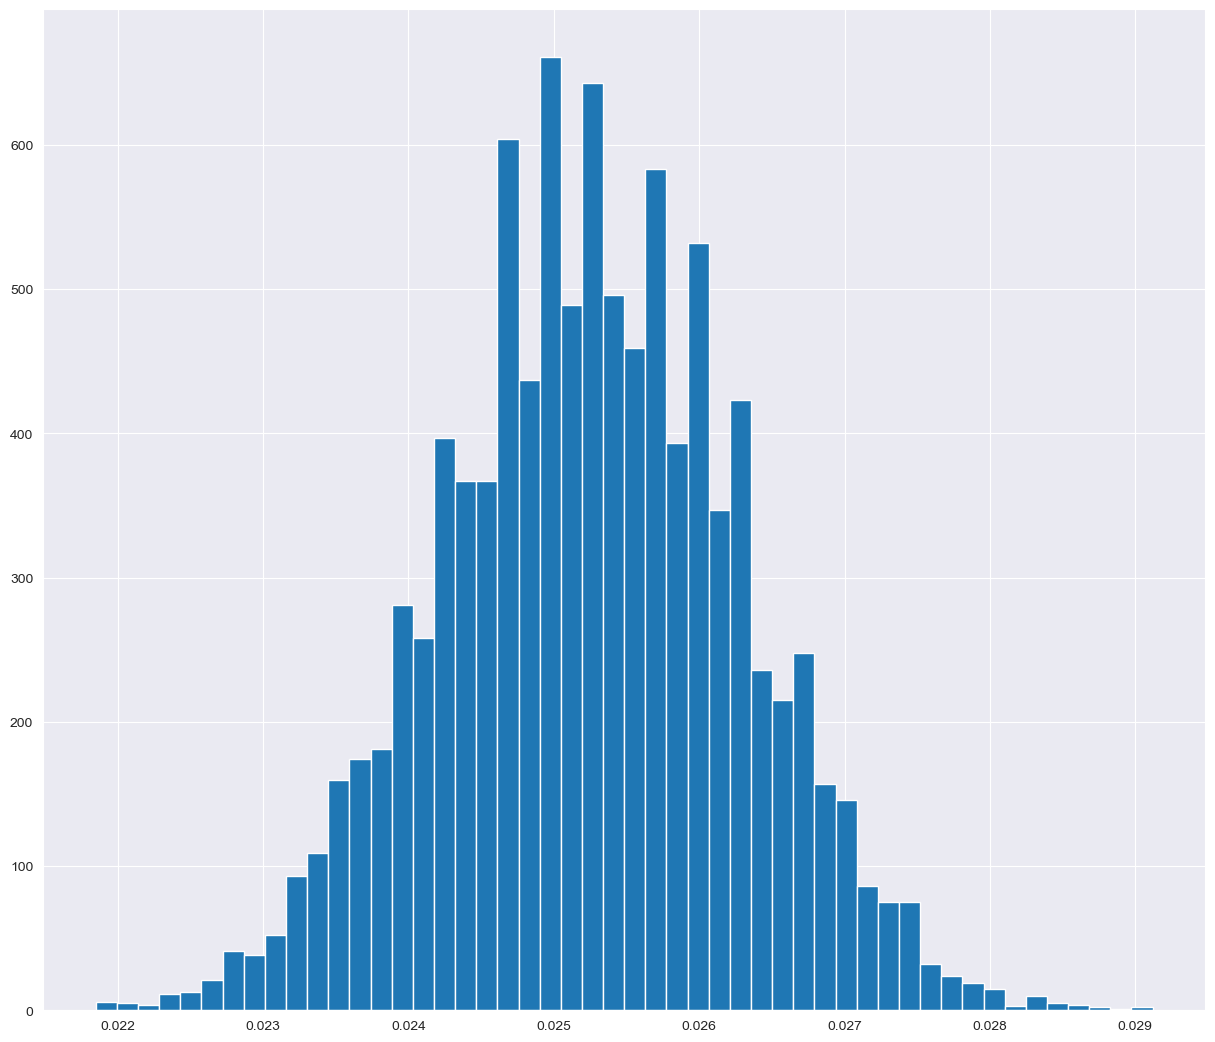

In [107]:
plt.figure(figsize=(15,13))
psa_converted = np.random.binomial(len(control),
                                   df.converted.mean(), 10000) / len(control)

plt.hist(psa_converted, bins=50 ,align = 'mid' , data=None)

plt.show()

In [80]:
p_diffs = ad_converted - psa_converted

p_diffs.mean()

-4.2133236865815895e-06

In [81]:
#real diff
# customer who is shown ads bought less
ab_data_diff = treatment['converted'].mean() - control['converted'].mean()
ab_data_diff

0.007692453192201517


Does showing ads to people lead to more purchases? Is this statistically significant or not?
Null Hypothesis (H0): Showing ads has no significant effect on the number of purchases.
Alternative Hypothesis (H1): Showing ads has a significant effect on the number of purchases.

In [109]:
# is buying less is 
if ab_data_diff > 0 : 
    p_value = (p_diffs > ab_data_diff).mean() * 100
else :
    p_value = (p_diffs <= ab_data_diff).mean() * 100
print ( "p_value = " ,p_value)
if p_value < 0.05:
    print( 'Reject the null hypothesis. There is a significant difference between the two groups.')
else:
    print( 'Fail to reject the null hypothesis. There is no significant difference between the two groups.')


p_value =  0.0
Reject the null hypothesis. There is a significant difference between the two groups.


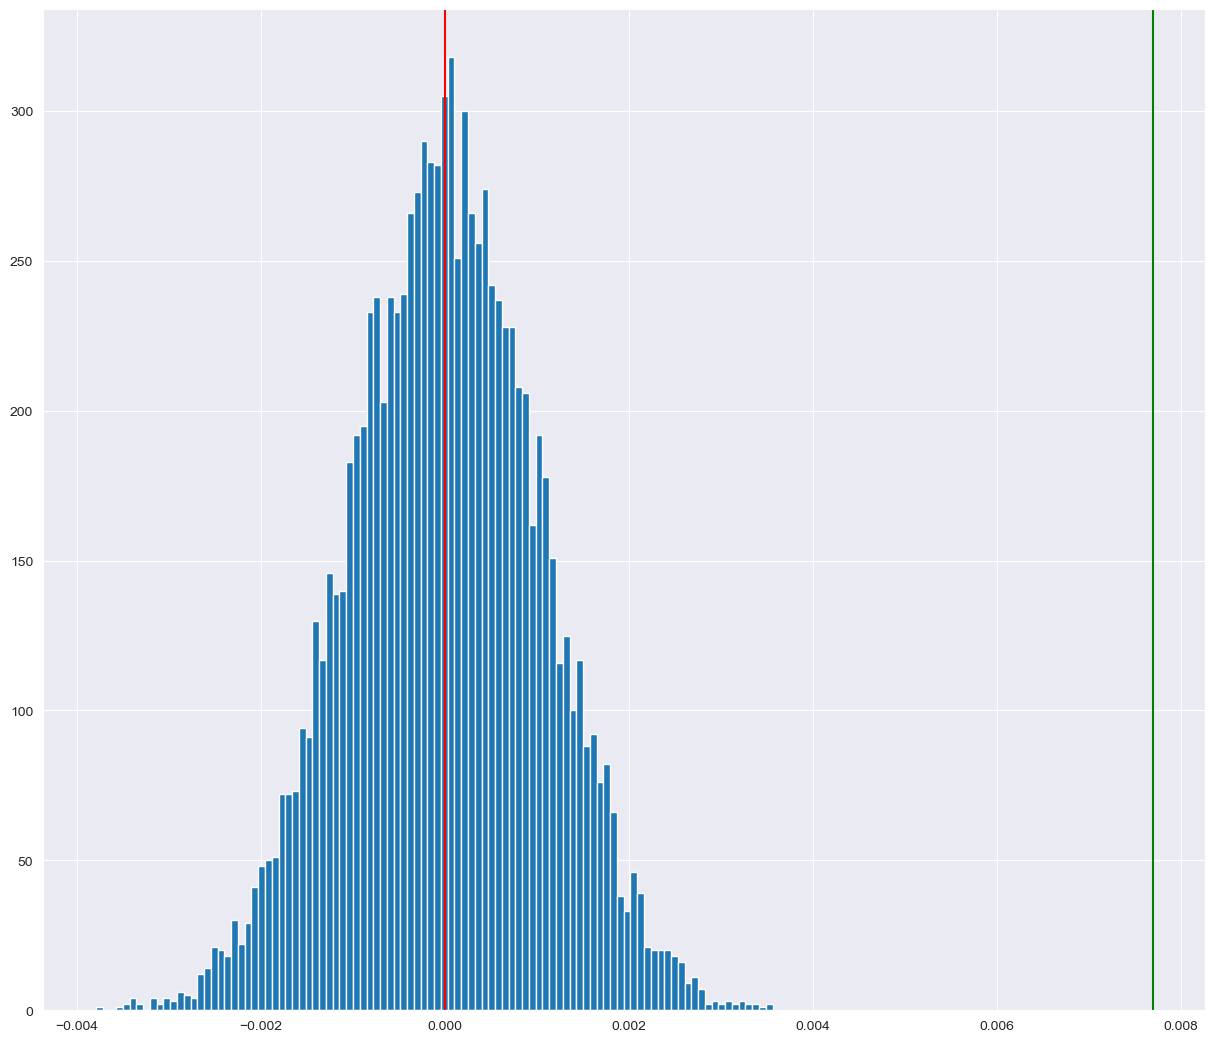

In [111]:
plt.figure(figsize=(15,13))
plt.hist(p_diffs, bins=100)
low = ab_data_diff
high = p_diffs.mean()
plt.axvline(x=low, color='g')
plt.axvline(x=higth, color='r')
plt.show()

# AB test using Code Simulation

In [84]:
treatment = df.query('test_group == "ad"')
control = df.query('test_group == "psa"')


In [85]:
dif = treatment["converted"].mean() - control["converted"].mean()
dif

0.007692453192201517

In [86]:
conversion = np.array([
    np.append(np.zeros(len(control["converted"])), np.ones(len(treatment["converted"]))),
    np.append(control["converted"],treatment["converted"])
])
conversion_t = conversion.T
conversion_t

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [87]:

def sh_exp(N):
    experiment_diff_mean = np.empty([N, 1])
    for times in np.arange(N):
        experiment_label = np.random.randint(0, 2, len(conversion_t))
        experiment_data = np.array([
            experiment_label,
            conversion_t[:, 1]
        ]).T
        experiment_diff_mean[times] = experiment_data[experiment_data[:, 0] == 1][:, 1].mean() - experiment_data[experiment_data[:, 0] == 0][:, 1].mean()
    return experiment_diff_mean


In [88]:
n=2000
p_difs = sh_exp(n)

if dif > 0  : 
    p_value = len(p_difs[p_difs >= dif]) / n * 100
else : 
    p_value = len(p_difs[p_difs <= dif]) / n * 100
    
if p_value < 0.05:
    print( 'Reject the null hypothesis. There is a significant difference between the two groups.')
else:
    print( 'Fail to reject the null hypothesis. There is no significant difference between the two groups.')


    

Reject the null hypothesis. There is a significant difference between the two groups.


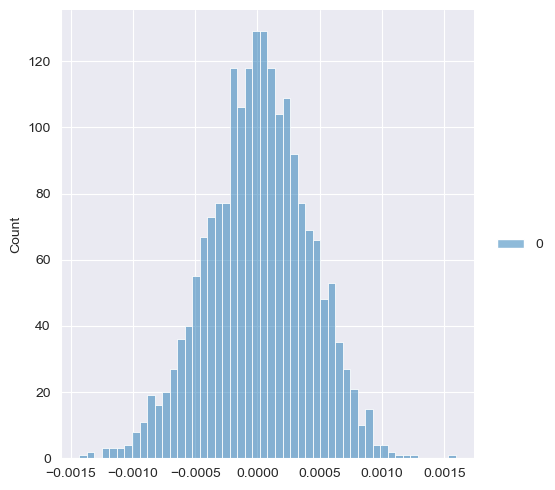

In [89]:
sns.displot(p_difs, bins=50)

# T-test 

#### check distribution of two groups by KDE

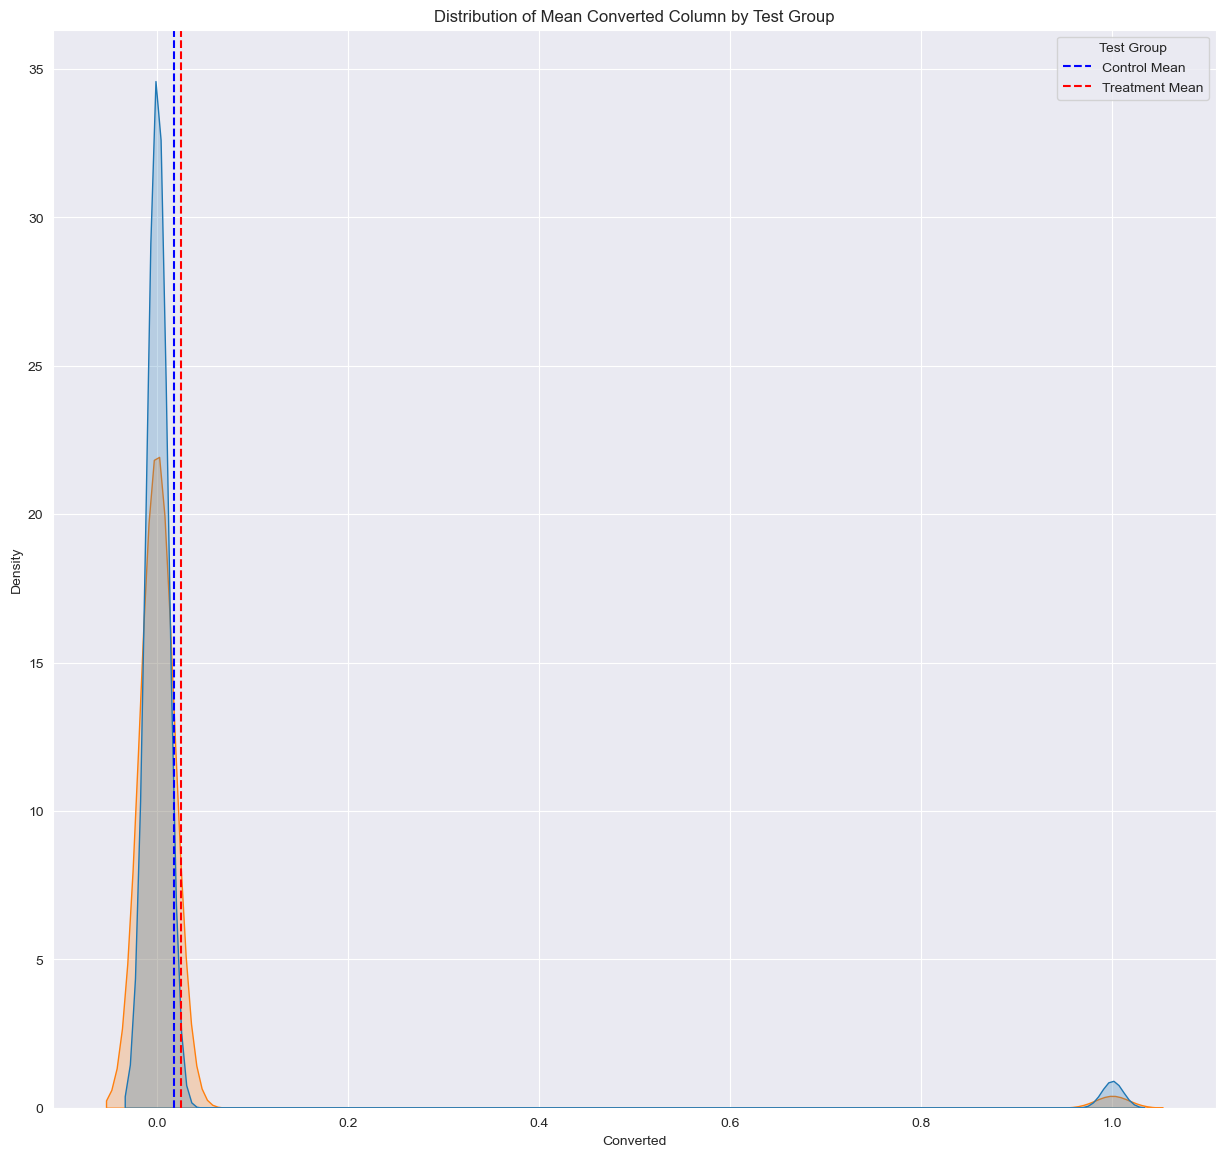

In [112]:



control_mean = df.loc[df['test_group'] == 'psa', 'converted'].mean()
treatment_mean = df.loc[df['test_group'] == 'ad', 'converted'].mean()

plt.figure(figsize=(15, 14))
sns.kdeplot(data=df, x='converted', hue='test_group', fill=True, common_norm=False)
plt.axvline(control_mean, color='b', linestyle='--', label='Control Mean')
plt.axvline(treatment_mean, color='r', linestyle='--', label='Treatment Mean')
plt.title('Distribution of Mean Converted Column by Test Group')
plt.xlabel('Converted')
plt.ylabel('Density')
plt.legend(title='Test Group')
plt.show()


##### check distribution of each group using bootstrap

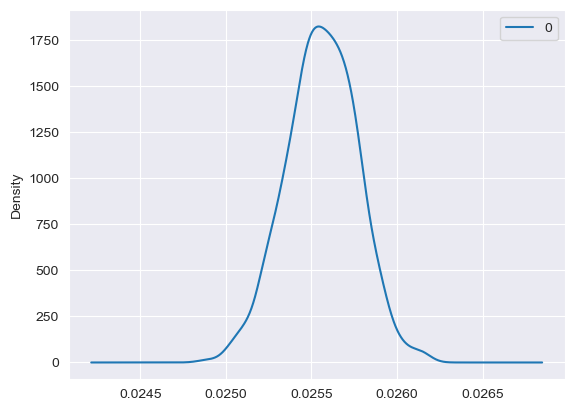

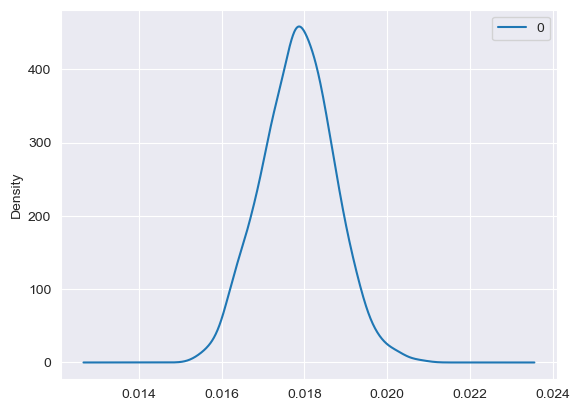

In [91]:
boot_treatment=[]
for i in range(1000):
    boot_mean = treatment.sample(frac=1, replace=True)['converted'].mean()
    boot_treatment.append(boot_mean)
boot_treatment=pd.DataFrame(boot_treatment)
boot_treatment.plot(kind='density');

boot_control=[]

for i in range(1000):
    boot_mean=control.sample(frac=1,replace=True)['converted'].mean()
    boot_control.append(boot_mean)
    
boot_control=pd.DataFrame(boot_control)
boot_control.plot(kind='density');
    

In [92]:

def t_test(treatment_data, control_data) :
    
    t_statistic, p_value = stats.ttest_ind(treatment_data, control_data)
    print("T-statistic:", t_statistic)
    print("P-value:", p_value)
    
    if p_value < 0.05 :    
        print( 'Reject the null hypothesis. There is a significant difference between the two groups.')
    else:
        print( 'Fail to reject the null hypothesis. There is no significant difference between the two groups.')

    return t_statistic, p_value
    

# Perform a t-test to compare the means of the two groups
t_statistic, p_value = t_test(treatment["converted"], control["converted"])

    

T-statistic: 7.37040597428566
P-value: 1.7033052627831264e-13
Reject the null hypothesis. There is a significant difference between the two groups.


# Chi2 Test

Does the display of advertisements correlate with the number of purchases or not?

In [93]:
ct = pd.crosstab(df['test_group'], df['converted'], margins=True)


ct

converted,False,True,All
test_group,,,
ad,550154,14423,564577
psa,23104,420,23524
All,573258,14843,588101


In [94]:

d = np.array([ct.iloc[0][: -1].values, ct.iloc[1][: -1].values])
d

array([[550154,  14423],
       [ 23104,    420]])

In [95]:
chi2, p_value, dof, expected  =stats.chi2_contingency(ct)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

Chi-square statistic: 54.318051591383124
P-value: 4.5144265218984724e-11
Degrees of freedom: 4
Expected frequencies:
[[550327.71899045  14249.28100955 564577.        ]
 [ 22930.28100955    593.71899045  23524.        ]
 [573258.          14843.         588101.        ]]


In [96]:
if p_value < 0.05:
    print ( 'Reject the null hypothesis. There is a significant difference between the two groups.')
else:
    print ('Fail to reject the null hypothesis. There is no significant difference between the two groups.')

  

Reject the null hypothesis. There is a significant difference between the two groups.
